#Network Analysis

Network science is a rapidly growing field that studies the patterns of connections between nodes in complex systems, such as social networks, biological systems, the internet, and more. Python, with its extensive libraries, has become a key tool for studying and visualizing these networks.

Modified from : Platt, E. (2019). Network Science with Python and NetworkX: Quick Start Guide.

Reference:
https://networkx.org/


In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
%pushd "/content/drive/MyDrive/MSSP607/Modules/Week10/"

/content/drive/MyDrive/MSSP607/Modules/Week10


['/content/drive/My Drive/MSSP607/Modules/Week10',
 '/content/drive/MyDrive/MSSP607/Modules/Week10',
 '/content/drive/My Drive/MSSP607/Modules/Week10',
 '/content']

#Creating a network

In [56]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)

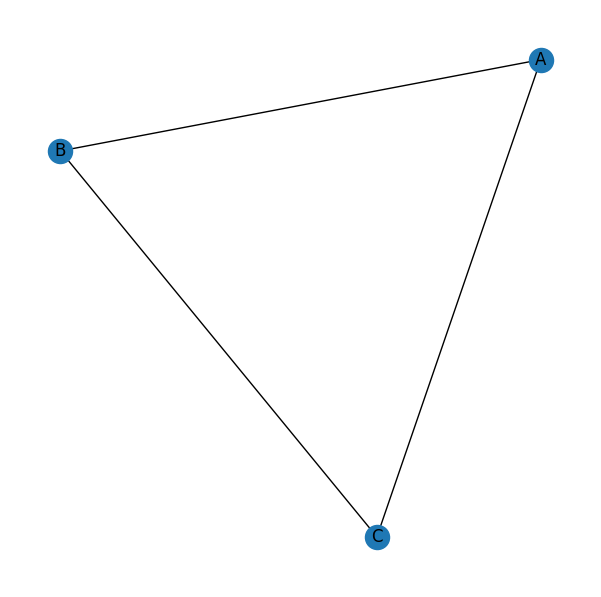

In [57]:
import networkx as nx

G = nx.Graph()

G.add_node('A')
G.add_nodes_from(['B', 'C'])

G.add_edge('A', 'B')
G.add_edges_from([('B', 'C'), ('A', 'C')])

plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(G)

In [58]:
# Seed random number generator
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)

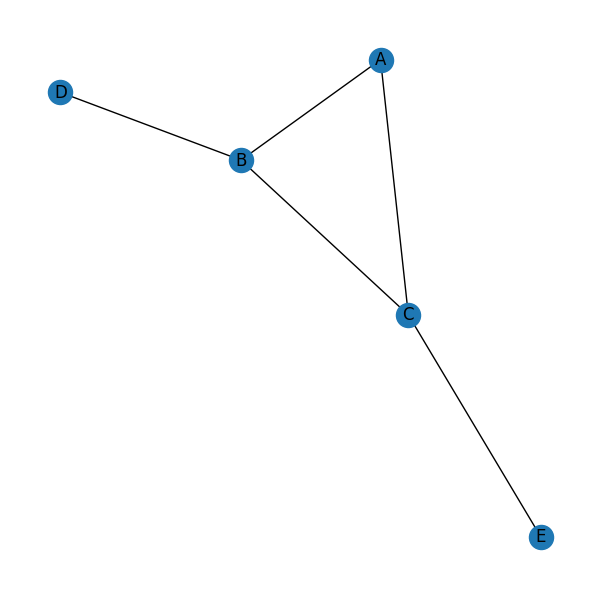

In [59]:
G.add_edges_from([('B', 'D'), ('C', 'E')])
nx.draw_networkx(G)

## The Graph Class: Working with undirected networks

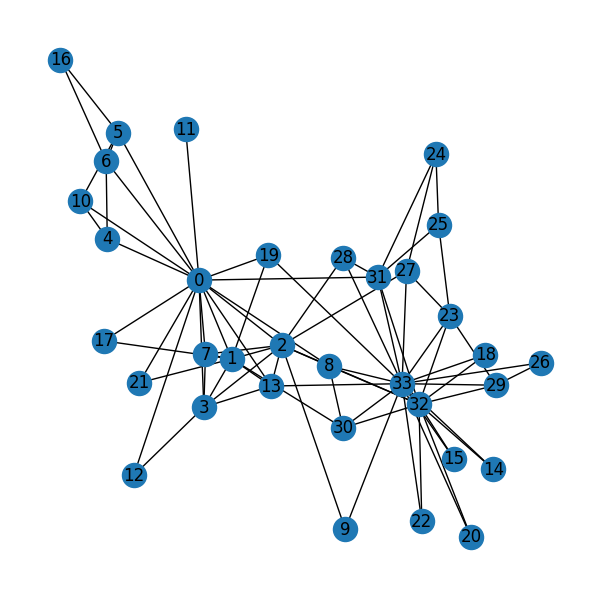

In [60]:
G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_pos)

In [61]:
list(G.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [62]:
list(G.edges)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

### Checking for nodes

In [63]:
mr_hi = 0
mr_hi in G

True

In [64]:
G.has_node(mr_hi)

True

In [65]:
wild_goose = 1337
wild_goose in G

False

In [66]:
G.has_node(wild_goose)

False

### Finding node neighbors

In [67]:
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [68]:
member_id = 1
(mr_hi, member_id) in G.edges

True

In [69]:
G.has_edge(mr_hi, member_id)

True

In [70]:
john_a = 33
(mr_hi, john_a) in G.edges

False

In [71]:
G.has_edge(mr_hi, john_a)

False

## Adding attributes to nodes and edges

In [72]:
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1]

In [73]:
for node_id in G.nodes:
    G.nodes[node_id]["club"] = member_club[node_id]

In [74]:
G.add_node(11, club=0)

In [75]:
G.nodes[mr_hi]

{'club': 0}

In [76]:
G.nodes[john_a]

{'club': 1}

In [77]:
node_color = [
    '#1f78b4' if G.nodes[v]["club"] == 0
    else '#33a02c' for v in G]

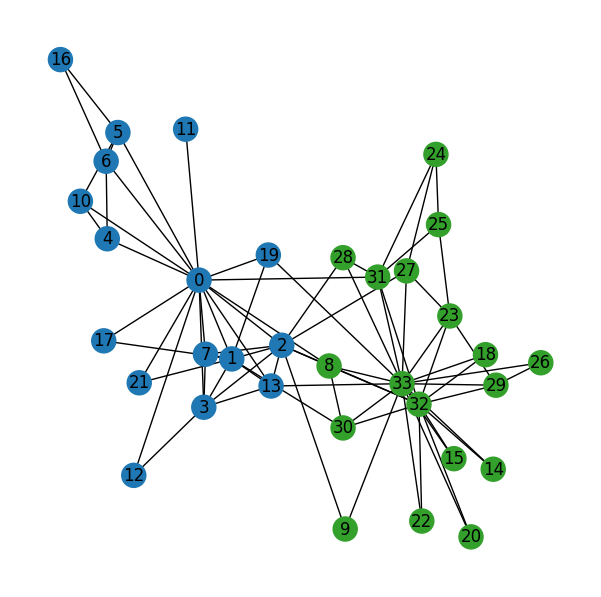

In [78]:
nx.draw_networkx(G, karate_pos, label=True, node_color=node_color)

In [79]:
# Iterate through all edges
for v, w in G.edges:
    # Compare `club` property of edge endpoints
    # Set edge `internal` property to True if they match
    if G.nodes[v]["club"] == G.nodes[w]["club"]:
        G.edges[v, w]["internal"] = True
    else:
        G.edges[v, w]["internal"] = False

In [80]:
internal = [e for e in G.edges if G.edges[e]["internal"]]
external = [e for e in G.edges if not G.edges[e]["internal"]]

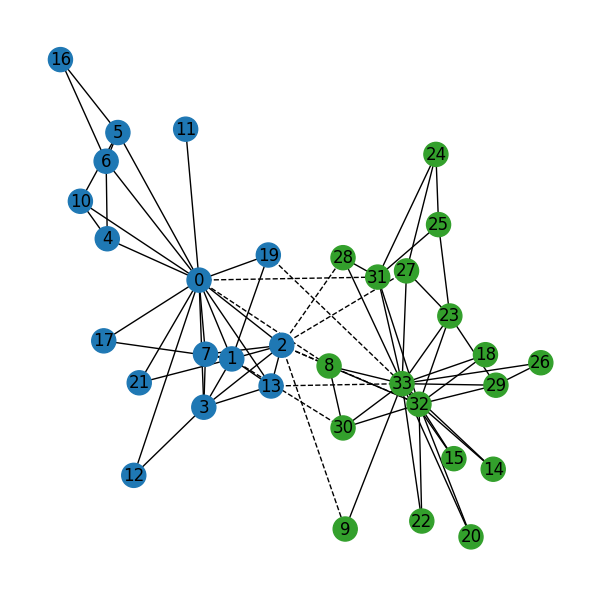

In [81]:
# Draw nodes and node labels
nx.draw_networkx_nodes(G, karate_pos, node_color=node_color)
nx.draw_networkx_labels(G, karate_pos)
# Draw internal edges as solid lines
nx.draw_networkx_edges(G, karate_pos, edgelist=internal)
# Draw external edges as dashed lines
nx.draw_networkx_edges(G, karate_pos, edgelist=external, style="dashed")

## Adding Edge Weights

In [82]:
def tie_strength(G, v, w):
    # Get neighbors of nodes v and w in G
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    # Return size of the set intersection
    return 1 + len(v_neighbors & w_neighbors)

In [83]:
# Calculate weight for each edge
for v, w in G.edges:
    G.edges[v, w]["weight"] = tie_strength(G, v, w)
# Store weights in a list
edge_weights = [G.edges[v, w]["weight"] for v, w in G.edges]

In [84]:
weighted_pos = nx.spring_layout(G, pos=karate_pos, k=0.3, weight="weight")

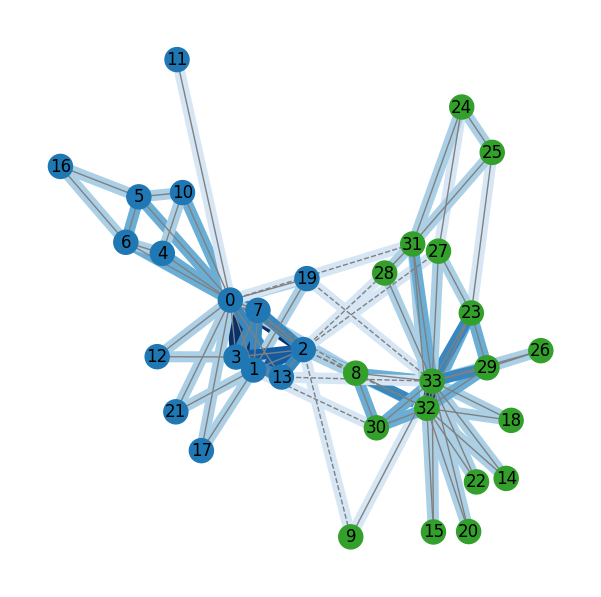

In [85]:
# Draw network with edge color determined by weight
nx.draw_networkx(
    G, weighted_pos, width=8, node_color=node_color,
    edge_color=edge_weights, edge_vmin=0, edge_vmax=6, edge_cmap=plt.cm.Blues)
# Draw solid/dashed lines on top of internal/external edges
nx.draw_networkx_edges(G, weighted_pos, edgelist=internal, edge_color="gray")
nx.draw_networkx_edges(G, weighted_pos, edgelist=external, edge_color="gray", style="dashed")

## The DiGraph Class: When direction matters

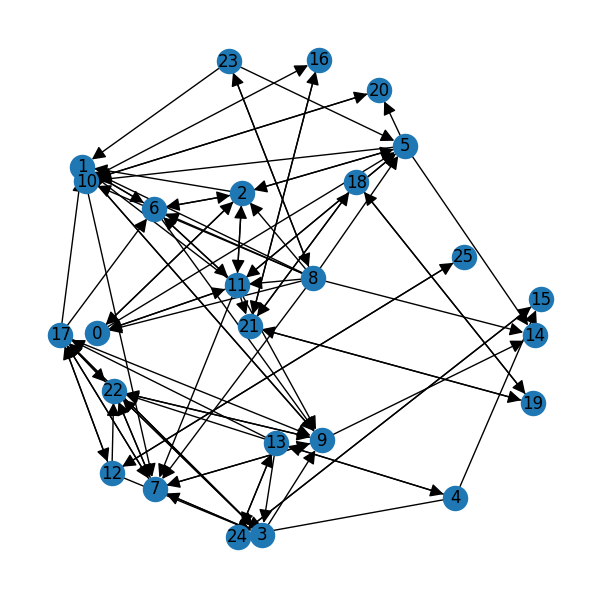

In [86]:
G = nx.read_gexf("klas12b-net-1.gexf", node_type=int)
student_pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx(G, student_pos, arrowsize=20)

In [87]:
list(G.neighbors(0))

[2, 5, 11]

In [88]:
list(G.successors(0))

[2, 5, 11]

In [89]:
list(G.predecessors(0))

[2, 11, 8]

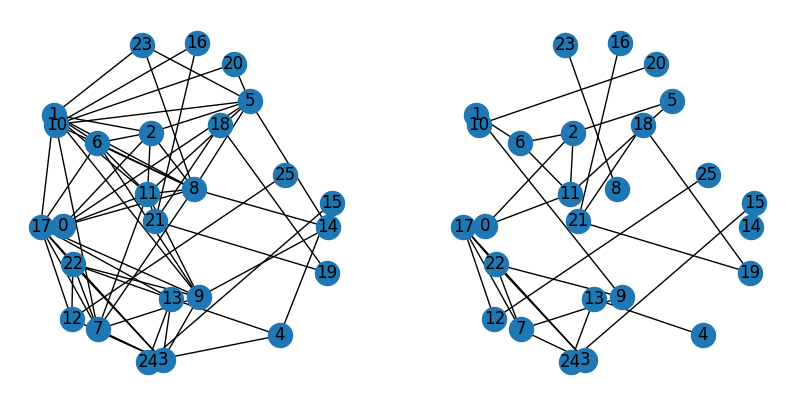

In [90]:
# Create undirected copies of G
G_either = G.to_undirected()
G_both = G.to_undirected(reciprocal=True)
# Set up a figure
plt.figure(figsize=(10,5))
# Draw G_either on left
plt.subplot(1, 2, 1)
nx.draw_networkx(G_either, student_pos)
# Draw G_both on right
plt.subplot(1, 2, 2)
nx.draw_networkx(G_both, student_pos)

## MultiGraph and MultiDiGraph: Parallel edges

In [91]:
# The seven bridges of Königsberg
G = nx.MultiGraph()
G.add_edges_from([
    ("North Bank", "Kneiphof", {"bridge": "Krämerbrücke"}),
    ("North Bank", "Kneiphof", {"bridge": "Schmiedebrücke"}),
    ("North Bank", "Lomse",    {"bridge": "Holzbrücke"}),
    ("Lomse",      "Kneiphof", {"bridge": "Dombrücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Grüne Brücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Köttelbrücke"}),
    ("South Bank", "Lomse",    {"bridge": "Hohe Brücke"})
])

[0, 1, 0, 0, 0, 1, 0]

In [92]:
list(G.edges)[0]

('North Bank', 'Kneiphof', 0)

In [93]:
G.edges['North Bank', 'Kneiphof', 0]

{'bridge': 'Krämerbrücke'}